In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,8)
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet

<br><br><h1 style='font-family:Trebuchet MS; color:#34495E'> 311 Complaints Analysis (HPD) </h1><center>

<table style='font-family:Trebuchet MS'>
<col width = '550'>
<col width = '450'>
<tr>
<td><img src="https://www1.nyc.gov/assets/hpd/images/content/pages/what-to-expect-sm.png" /></td>
<td>
The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The <b>Department of Housing Preservation and Development</b> of New York City is the agency that processes 311 complaints that are related to housing and buildings.<br>
<br>    
In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

</td>
</tr>
</table>

<p style='font-family:Trebuchet MS'> In this notebook, we will try to predict future complaint cases which is actually out of the scope of Problem Statement. However, this is completed due to my personal interest. The timeseries forecasting is conducted on dataset filtered to HEAT/HOT WATER complaint type in BRONX borough as we are continuing from the previous section. 

<h1 style='font-family:Trebuchet MS; color:#34495E'> Table of Contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px; font-family:Trebuchet MS; color:#34495E">

1.  [About Dataset](#1)<br>
2.  [Data Preparation](#2)<br>
3.  [Forecasting with ARIMA](#3)<br>
4.  [Forecasting with fbProphet](#4)<br>
5.  [Conclusion](#5)<br>


</div>

<h1 style='font-family:Trebuchet MS; color:#34495E'> About Dataset 1<a id='1'></a></h1>
<p style='font-family:Trebuchet MS'>This dataset will have complaints submitted between 2010 and 2020. It can be downloaded from <a href = 'https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status'> here </a>.
<table style='font-family:Trebuchet MS'>
  <tr>
    <th>Field</th>
    <th>Description</th>
  </tr>
  <tr>
      <td><code>created_date</code></td>
    <td>Date SR was created. </td>
  </tr>
  <tr>
    <td><code>unique_key</code></td>
    <td>Unique identifier of a Service Request (SR) in the open data set. </td>
  </tr>  
  <tr>
    <td><code>complaint_type</code></td>
    <td>This is the first level of a hierarchy identifying the topic of the incident or condition. Complaint Type may have a corresponding Descriptor (below) or may stand alone.</td>
  </tr>  
  <tr>
    <td><code>incident_zip</code></td>
    <td>Incident location zip code, provided by geo validation.</td>
  </tr> 
    <tr>
    <td><code>incident_address</code></td>
    <td>House number of incident address provided by submitter.</td>
  </tr> 
    <tr>
    <td><code>street_name</code></td>
    <td>Street name of incident address provided by the submitter.</td>
  </tr>  
    <tr>
    <td><code>address_type</code></td>
    <td>Type of incident location information available.</td>
  </tr> 
    <tr>
    <td><code>city</code></td>
    <td>City of the incident location provided by geovalidation. </td>
  </tr>
    <tr>
    <td><code>resolution_description</code></td>
    <td>Describes the last action taken on the SR by the responding agency. May describe next or future steps. </td>
  </tr>    
    <tr>
    <td><code>borough</code></td>
    <td>Provided by the submitter and confirmed by geovalidation.</td>
  </tr>    
    <tr>
    <td><code>latitude</code></td>
    <td>Geo based Lat of the incident location.</td>
  </tr>   
    <tr>
    <td><code>longitude</code></td>
    <td>Geo based Long of the incident location.</td>
  </tr>       
    <tr>
    <td><code>closed_date</code></td>
    <td>Date SR was closed by responding agency. </td>
  </tr>           
    <tr>
    <td><code>location_type</code></td>
    <td>Describes the type of location used in the address information. </td>
  </tr> 
    <tr>
    <td><code>status</code></td>
    <td>Status of SR submitted. </td>
  </tr> 
    
    
    
    
</table>

<p style='font-family:Trebuchet MS'> In this case, we will only need the <code>created_date, complaint_type, borough</code> from this dataset. 

<h1 style='font-family:Trebuchet MS; color:#34495E'>Data Preparation<a id='2'></a></h1>

In [2]:
df= pd.read_csv('fhrw-4uyv (3).csv')

In [3]:
df = df[(df['complaint_type'] == 'HEAT/HOT WATER')&(df['borough'] == 'BRONX')]

In [5]:
df = df[['created_date', 'complaint_type']]

In [6]:
df = df.set_index(['created_date'])

In [8]:
df.index = pd.to_datetime(df.index)

In [10]:
df = df.resample('MS').count()

<h1 style='font-family:Trebuchet MS; color:#34495E'>Forecasting with ARIMA<a id='3'></a></h1>

In [11]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [12]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1743.5187526901314
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1449.686597866437
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1334.203315054568
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1095.2298421031358
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1348.726894643758
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1318.2466039441067

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1125.071593225506
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1097.3417521171727
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1685.1287344634245
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1409.0256362630626
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1318.6801372098591
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1083.584457325737
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1349.3941259762287
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1419.761276662515
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1126.6600020847109
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1085.4160008431911
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1605.937158048993
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1349.6168485097073
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1365.1696495583144
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1108.4384936252045
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1363.4248248238143
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1340.6162192844286
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1151.854273106442
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1110.5404912985

<p style='font-family:Trebuchet MS'>The above output suggests that SARIMAX(0, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value, an optimal option.

<p style='font-family:Trebuchet MS; color:#34495E'>Fitting the ARIMA model

In [14]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

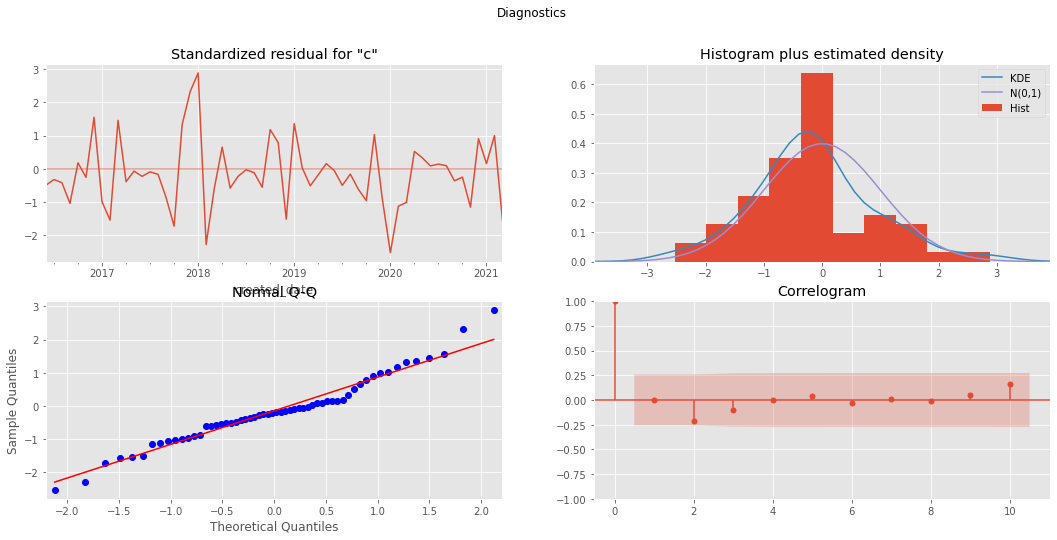

In [16]:
results.plot_diagnostics()
plt.suptitle('Diagnostics')
plt.show()

<p style='font-family:Trebuchet MS; color:#34495E'>Observation:<br>
<p style='font-family:Trebuchet MS'>It is not perfect, however, this model diagnostics suggests that the model residuals are near normally distributed.

<p style='font-family:Trebuchet MS; color:#34495E'>Validating forecasts

<p style='font-family:Trebuchet MS'>To understand the accuracy of the forecasts, predicted number of complaint cases is compared to the cases of the original data set, and the forecasts is set to start at 2017–01–01 to the end of the data.

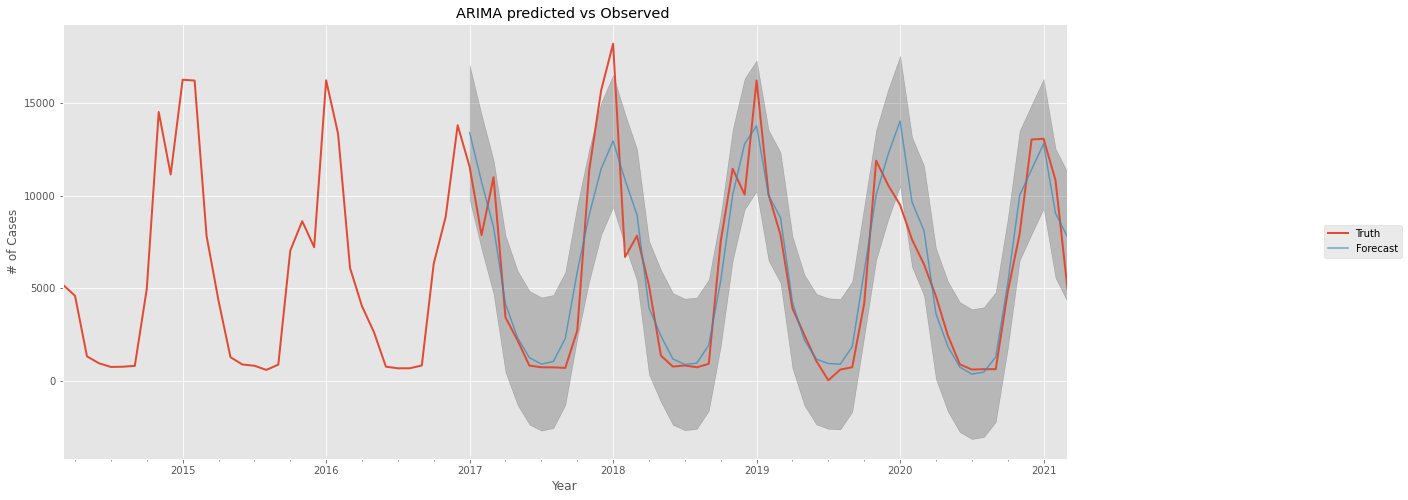

In [19]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df.plot(label='observed', linewidth=2)
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Year')
ax.set_ylabel('# of Cases')
plt.legend(labels = ('Truth', 'Forecast'), loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.title('ARIMA predicted vs Observed ')
plt.show()

<p style='font-family:Trebuchet MS; color:#34495E'>Observation:<br>


<p style='font-family:Trebuchet MS'>The line plot is showing the observed values compared to the rolling forecast predictions. Overall, the forecasts are align with the true values very well, showing an upward trend starts from the end of the year and captured the seasonality toward the heat season (from October to May).

In [21]:
y_forecasted = pred.predicted_mean
y_truth = df['2017-01-01':]

print('RMSE = %.1f'  %np.sqrt(mean_squared_error(y_forecasted,  y_truth)))

RMSE = 1911.7


<p style='font-family:Trebuchet MS'>In statistics, Root Mean Square Error (RMSE) indicates that this model was able to forecast the monthly complaint cases in the test set within 1911 of the real number of cases. Knowing that the monthly complaint cases range from around 400 to over 150,000. In my opinion, this is a pretty good model so far.

<p style='font-family:Trebuchet MS; color:#34495E'>Producing and visualizing forecasts

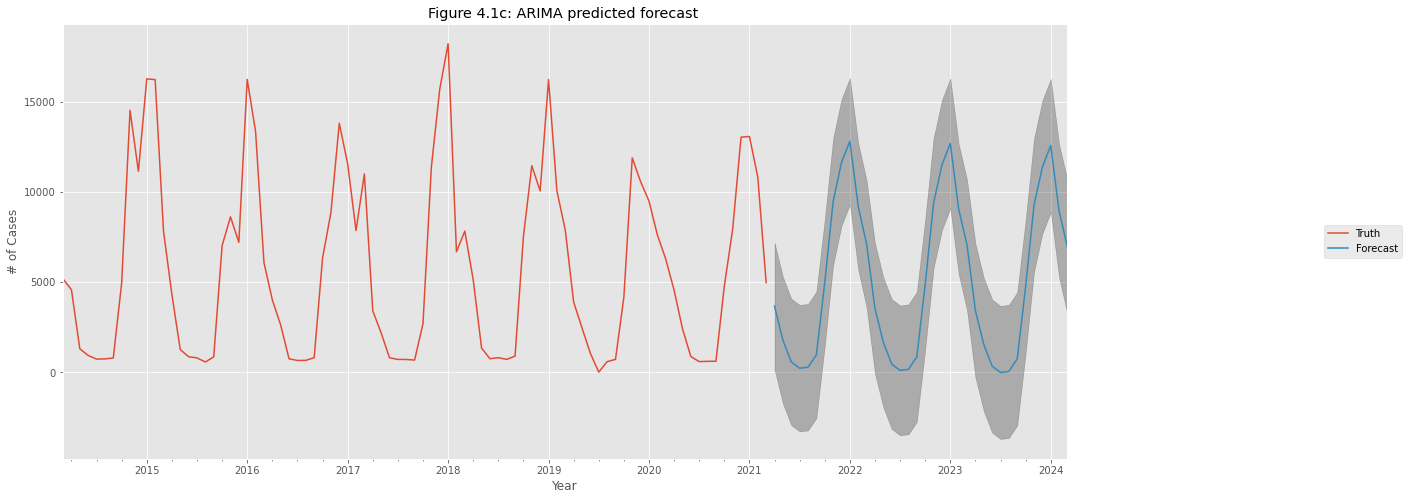

In [22]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()
ax =  df.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Year')
ax.set_ylabel('# of Cases')
plt.legend(labels = ('Truth', 'Forecast'), loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.title('Figure 4.1c: ARIMA predicted forecast ')
plt.show()

<p style='font-family:Trebuchet MS; color:#34495E'>Observation:<br>

<p style='font-family:Trebuchet MS'>This model clearly captured monthly complaint cases seasonality. However, as the forecast further out into the future, it is natural that the values to become less accurate (eg. the minimum is decreasing below 0).

<h1 style='font-family:Trebuchet MS; color:#34495E'>Forecasting with fbProphet<a id='4'></a></h1>

<p style='font-family:Trebuchet MS'> Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints.

<p style='font-family:Trebuchet MS; color:#34495E'>Data Preparation

In [27]:
z = df
z = z.reset_index()
z.rename(columns={'created_date':'ds', 'complaint_type':'y'}, inplace=True)

<p style='font-family:Trebuchet MS; color:#34495E'>Fitting the Prophet model

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


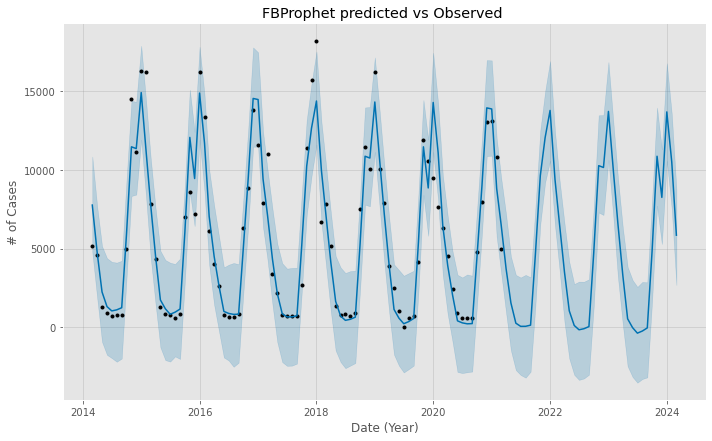

In [33]:
m = Prophet(interval_width=0.95)
m.fit(z)
future = m.make_future_dataframe(periods=36, freq='MS')
forecast = m.predict(future)
m.plot(forecast)


plt.title('FBProphet predicted vs Observed ')
plt.xlabel('Date (Year)')
plt.ylabel('# of Cases')
plt.show()

<p style='font-family:Trebuchet MS; color:#34495E'>Observation:<br>

<p style='font-family:Trebuchet MS'>This model has the same pattern with ARIMA model. It also clearly captured monthly complaint cases seasonality. However, as the forecast further out into the future, it is natural that the values to become less accurate (eg. the value is decreasing below 0).

In [46]:
y_forecasted = forecast['yhat'][34:82]
y_truth = df['2017-01-01':]

print('RMSE = %.1f'  %np.sqrt(mean_squared_error(y_forecasted,  y_truth[:48])))

RMSE = 1618.8


<h1 style='font-family:Trebuchet MS; color:#34495E'>Conclusion<a id='5'></a></h1>

<p style='font-family:Trebuchet MS'> Both TimeSeries Forecasting gave similar RMSE, at ARIMA(1911) and FbProphet(1618). Comparing both RMSE, FbProphet did a better job in predicting the number of complaints with a smaller RMSE.